In [1]:
#from sklearn.svm import OneClassSVM
#from sklearn import preprocessing
# ---> https://www.kaggle.com/mahdishirmohammadi/heart-disease-binary-classification

# Data science and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
import scipy.stats

# Models
import sklearn
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
# dataset => https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset
print("Data Shape:", df.shape)

Data Shape: (253680, 22)


In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
HeartDiseaseorAttack    253680 non-null float64
HighBP                  253680 non-null float64
HighChol                253680 non-null float64
CholCheck               253680 non-null float64
BMI                     253680 non-null float64
Smoker                  253680 non-null float64
Stroke                  253680 non-null float64
Diabetes                253680 non-null float64
PhysActivity            253680 non-null float64
Fruits                  253680 non-null float64
Veggies                 253680 non-null float64
HvyAlcoholConsump       253680 non-null float64
AnyHealthcare           253680 non-null float64
NoDocbcCost             253680 non-null float64
GenHlth                 253680 non-null float64
MentHlth                253680 non-null float64
PhysHlth                253680 non-null float64
DiffWalk                253680 non-null float64
Sex                     2

## Feature Information
- HeartDiseaseorAttack : 0/1 심장병여부
- HighBP : 0/1
- HighChol : 0/1
- CholCheck : 0/1
- BMI 
- Smoker : 0/1 
- Stroke : 0/1
- Diabetes : 0/1
- PhysActivity : 0/1
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- GenHlth
- MentHlth
- PhysHlth 
- DiffWalk
- Sex
- Age
- Education
- Income

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 01. 데이터 파악하기

In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
# 심장병 여부 ==> 'HeartDiseaseorAttack' 컬럼
print("Values are: ", df.HeartDiseaseorAttack.unique())
print("Value Counts: ")
print(df.HeartDiseaseorAttack.value_counts())

Values are:  [0. 1.]
Value Counts: 
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


In [9]:
# 심장병 여부(y/n)별 비중
df.HeartDiseaseorAttack.value_counts() / len(df)*100

0.0    90.581441
1.0     9.418559
Name: HeartDiseaseorAttack, dtype: float64

### 데이터셋 분리

In [10]:
# HeartDiseaseorAttack 컬럼만 분리

X = df[df.columns[1:]]
y = df['HeartDiseaseorAttack']

In [11]:
# 정상인
normal_patient_df = df.loc[df["HeartDiseaseorAttack"] == 0]
X0 = normal_patient_df[normal_patient_df.columns[1:]]
y0 = normal_patient_df['HeartDiseaseorAttack']

In [12]:
# 심장병 환자
heart_disease_patient_df = df.loc[df["HeartDiseaseorAttack"] == 1]
X1 = heart_disease_patient_df[heart_disease_patient_df.columns[1:]]
y1 = heart_disease_patient_df['HeartDiseaseorAttack']

### StandardScaler()를 사용한 스케일링 작업

In [13]:
# 다양한 Scaler 종류 및 사용시 참고내용

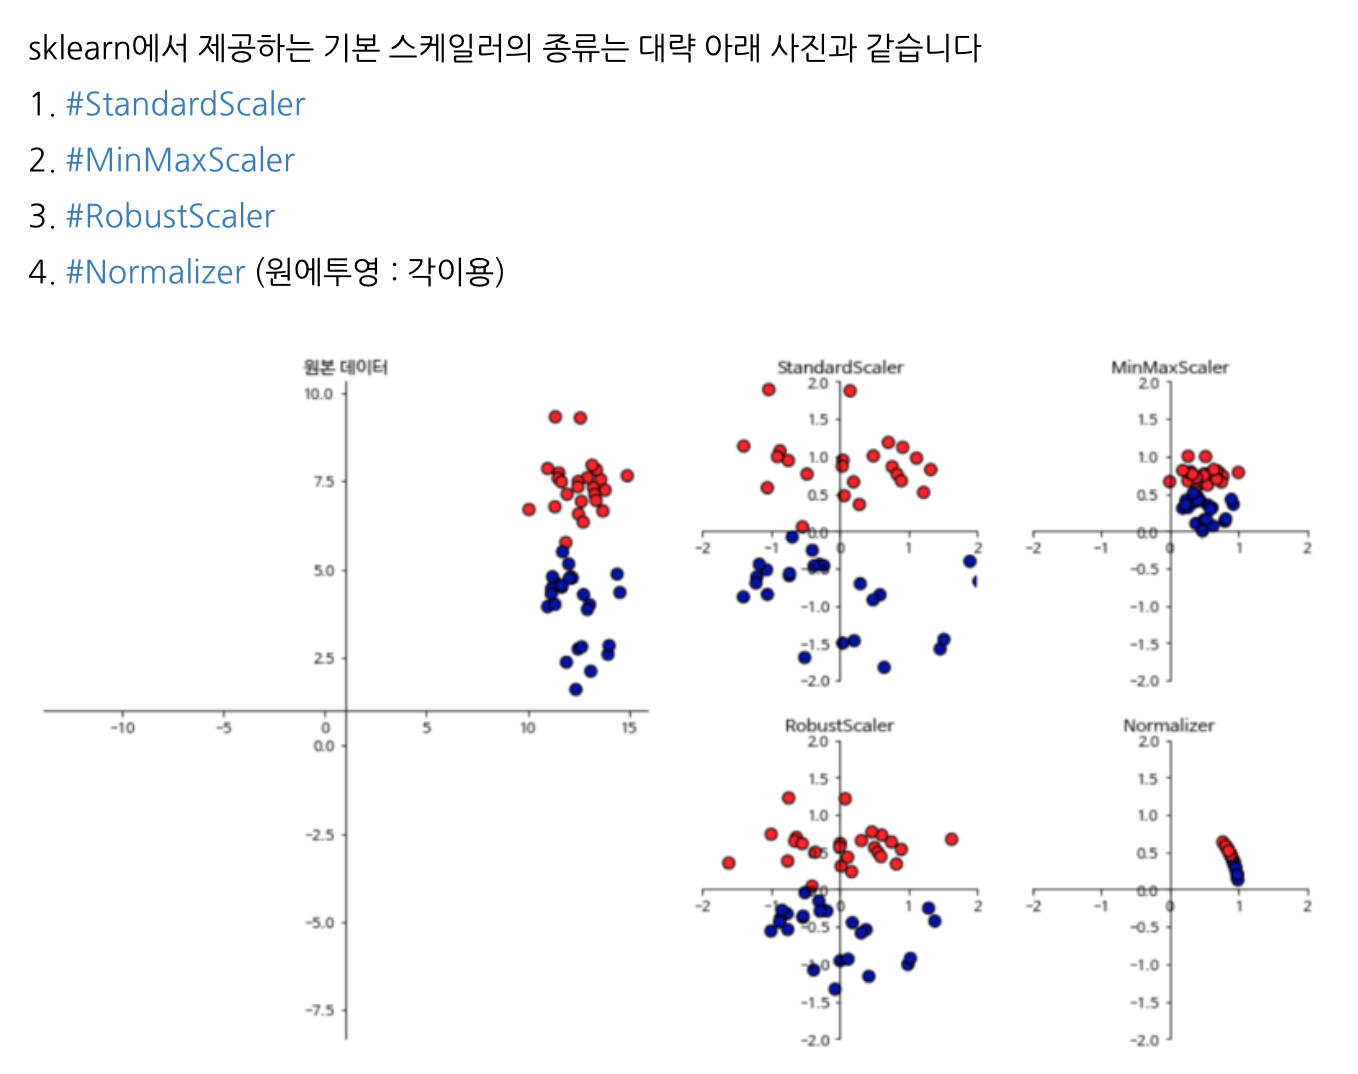

In [94]:
from IPython.display import Image  
Image("Scaler_Types.png", width = 600, height = 100)  
# ![Screen%20Shot%202022-01-30%20at%204.58.17%20PM.png](attachment:Screen%20Shot%202022-01-30%20at%204.58.17%20PM.png)

In [95]:
# 이 중에서 StandardScaler()를 사용해 스케일링할 예정 
# ----->>>>>>> 선정이유는 나중에 추가

In [15]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [16]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.425292,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.425292,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.425292,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


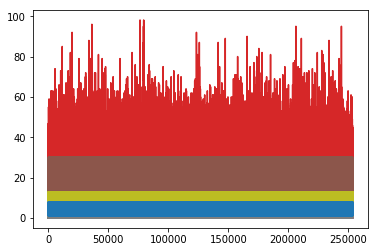

In [18]:
# 스케일링 작업 전
plt.plot(X)
plt.show()

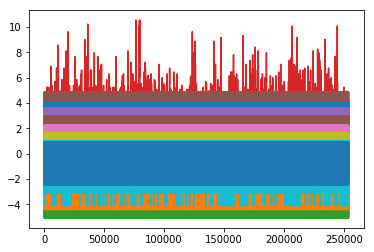

In [19]:
# 스케일링 작업 후 
plt.plot(X_scaled)
plt.show()

### 기초분석

### 1. T test

In [20]:
# 정상인과 심장병 환자간 feature 평균값 비교
mean_df = pd.concat([X0.mean(),X0.mean()],axis = 1)
mean_df.columns = ['Normal','Heart_disease_patient']

print(mean_df)

                      Normal  Heart_disease_patient
HighBP              0.395588               0.395588
HighChol            0.395314               0.395314
CholCheck           0.959967               0.959967
BMI                28.269624              28.269624
Smoker              0.424837               0.424837
Stroke              0.027656               0.027656
Diabetes            0.256337               0.256337
PhysActivity        0.768625               0.768625
Fruits              0.637329               0.637329
Veggies             0.816360               0.816360
HvyAlcoholConsump   0.058350               0.058350
AnyHealthcare       0.949749               0.949749
NoDocbcCost         0.081401               0.081401
GenHlth             2.422369               2.422369
MentHlth            3.030306               3.030306
PhysHlth            3.731299               3.731299
DiffWalk            0.142567               0.142567
Sex                 0.426560               0.426560
Age         

### 2. 상관관계

In [28]:
X_columns = df.columns
result = scipy.stats.ttest_ind(normal_patient_df, heart_disease_patient_df, equal_var=False)
pd.DataFrame(result.pvalue,index=X_columns,columns=['p_value'])

,p_value
HeartDiseaseorAttack,0.000000e+00
HighBP,0.000000e+00
HighChol,0.000000e+00
CholCheck,4.697559e-279
BMI,2.432045e-149
Smoker,0.000000e+00
Stroke,0.000000e+00
Diabetes,0.000000e+00
PhysActivity,0.000000e+00
Fruits,8.683952e-23


In [29]:
# pearson 상관관계 
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


> t test & p-value가 과연 이 데이터셋에... 의미있는 분석방법인지 의문이네요

### Heatmap

(21.5, 0.0)

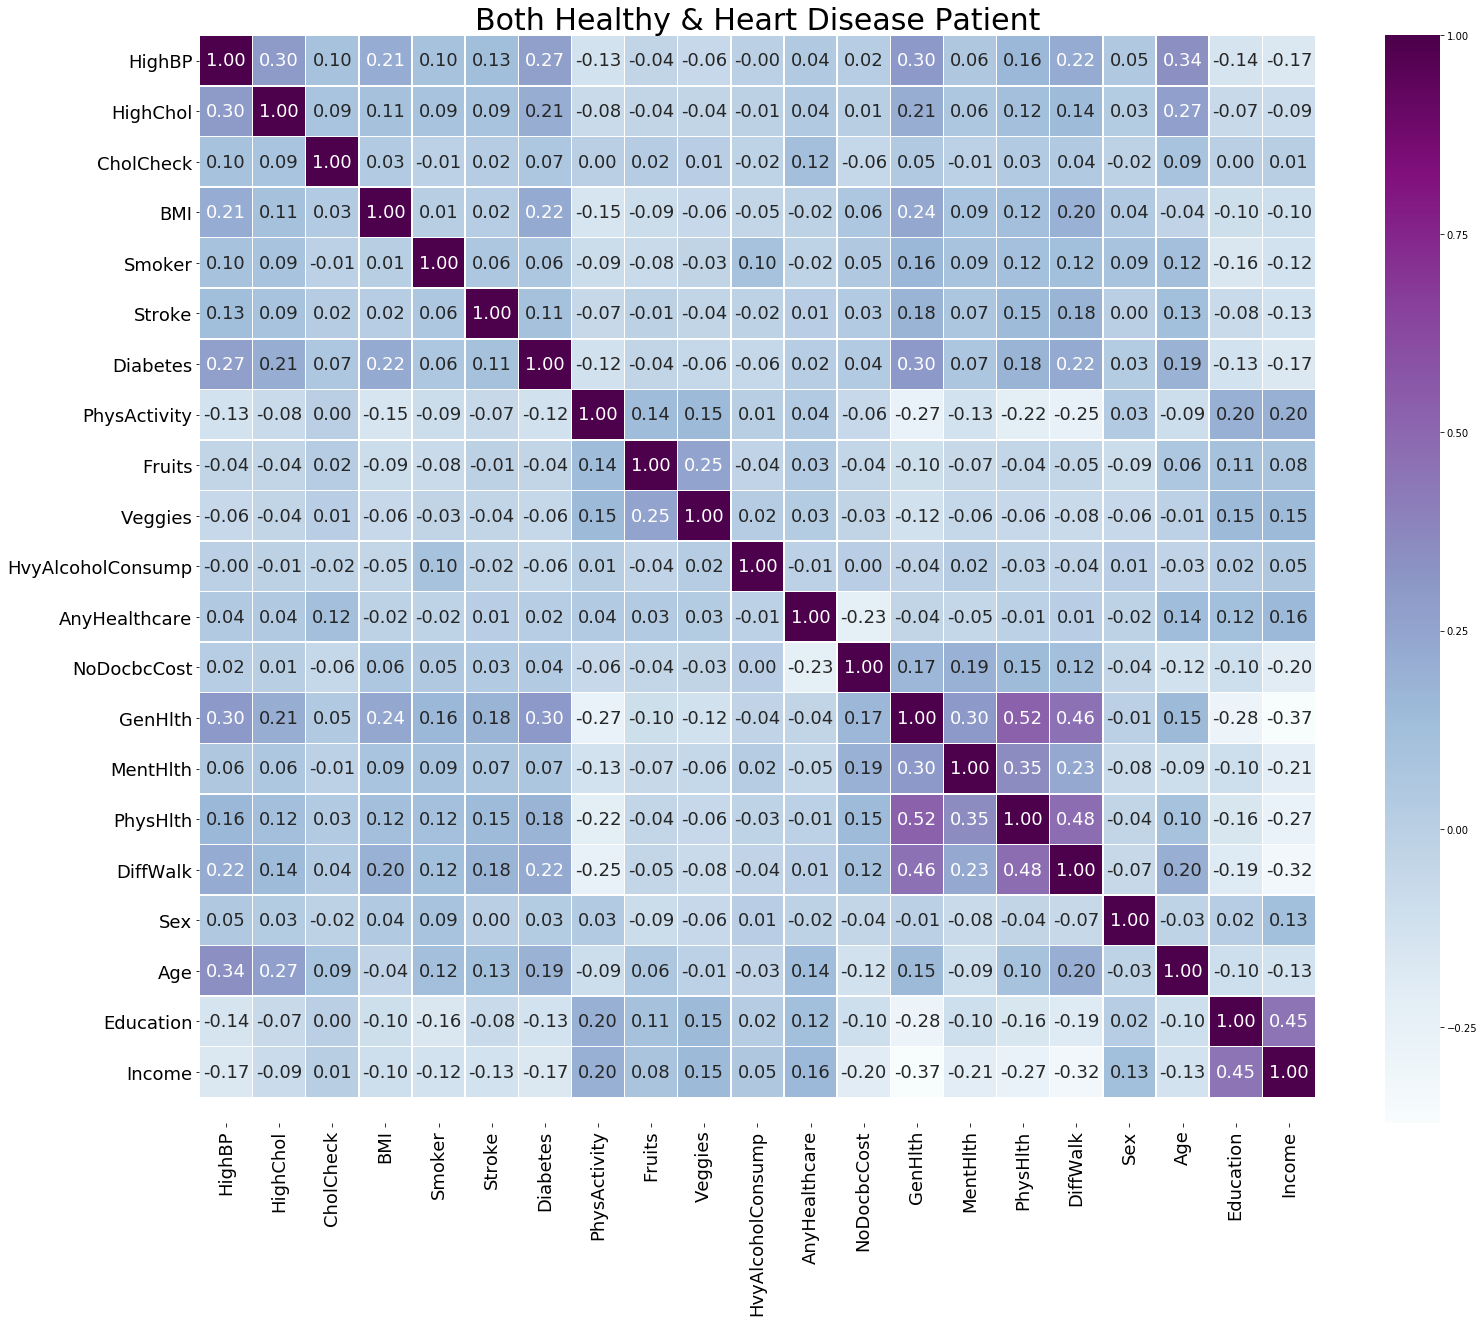

In [30]:
# 시각화 관련 source =>  https://dsbook.tistory.com/52?category=780539
# heatmap color guide => https://matplotlib.org/stable/tutorials/colors/colormaps.html
# heatmap 관련 documentation => https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr_matrix = X_scaled.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Both Healthy & Heart Disease Patient", size = 30 )
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='BuPu')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

(22.5, 0.0)

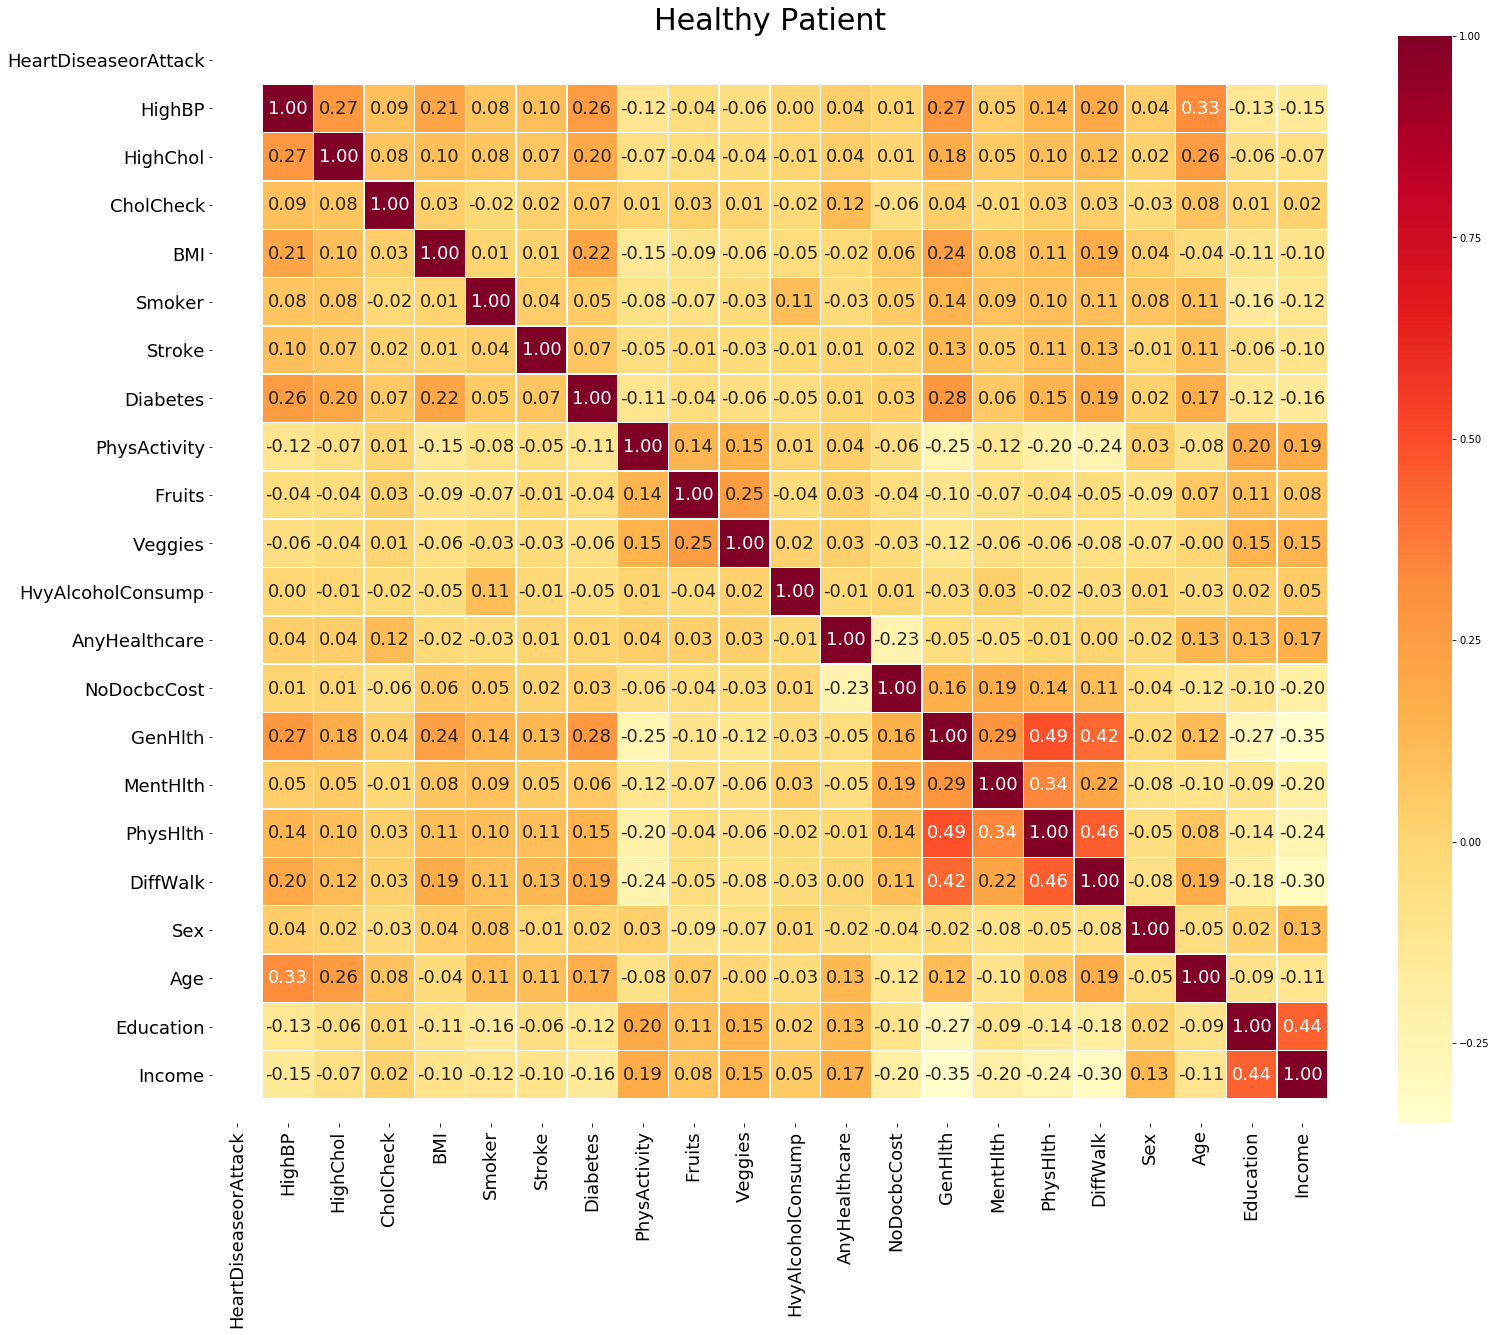

In [31]:
corr_matrix = normal_patient_df.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Healthy Patient", size = 30)
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

(22.5, 0.0)

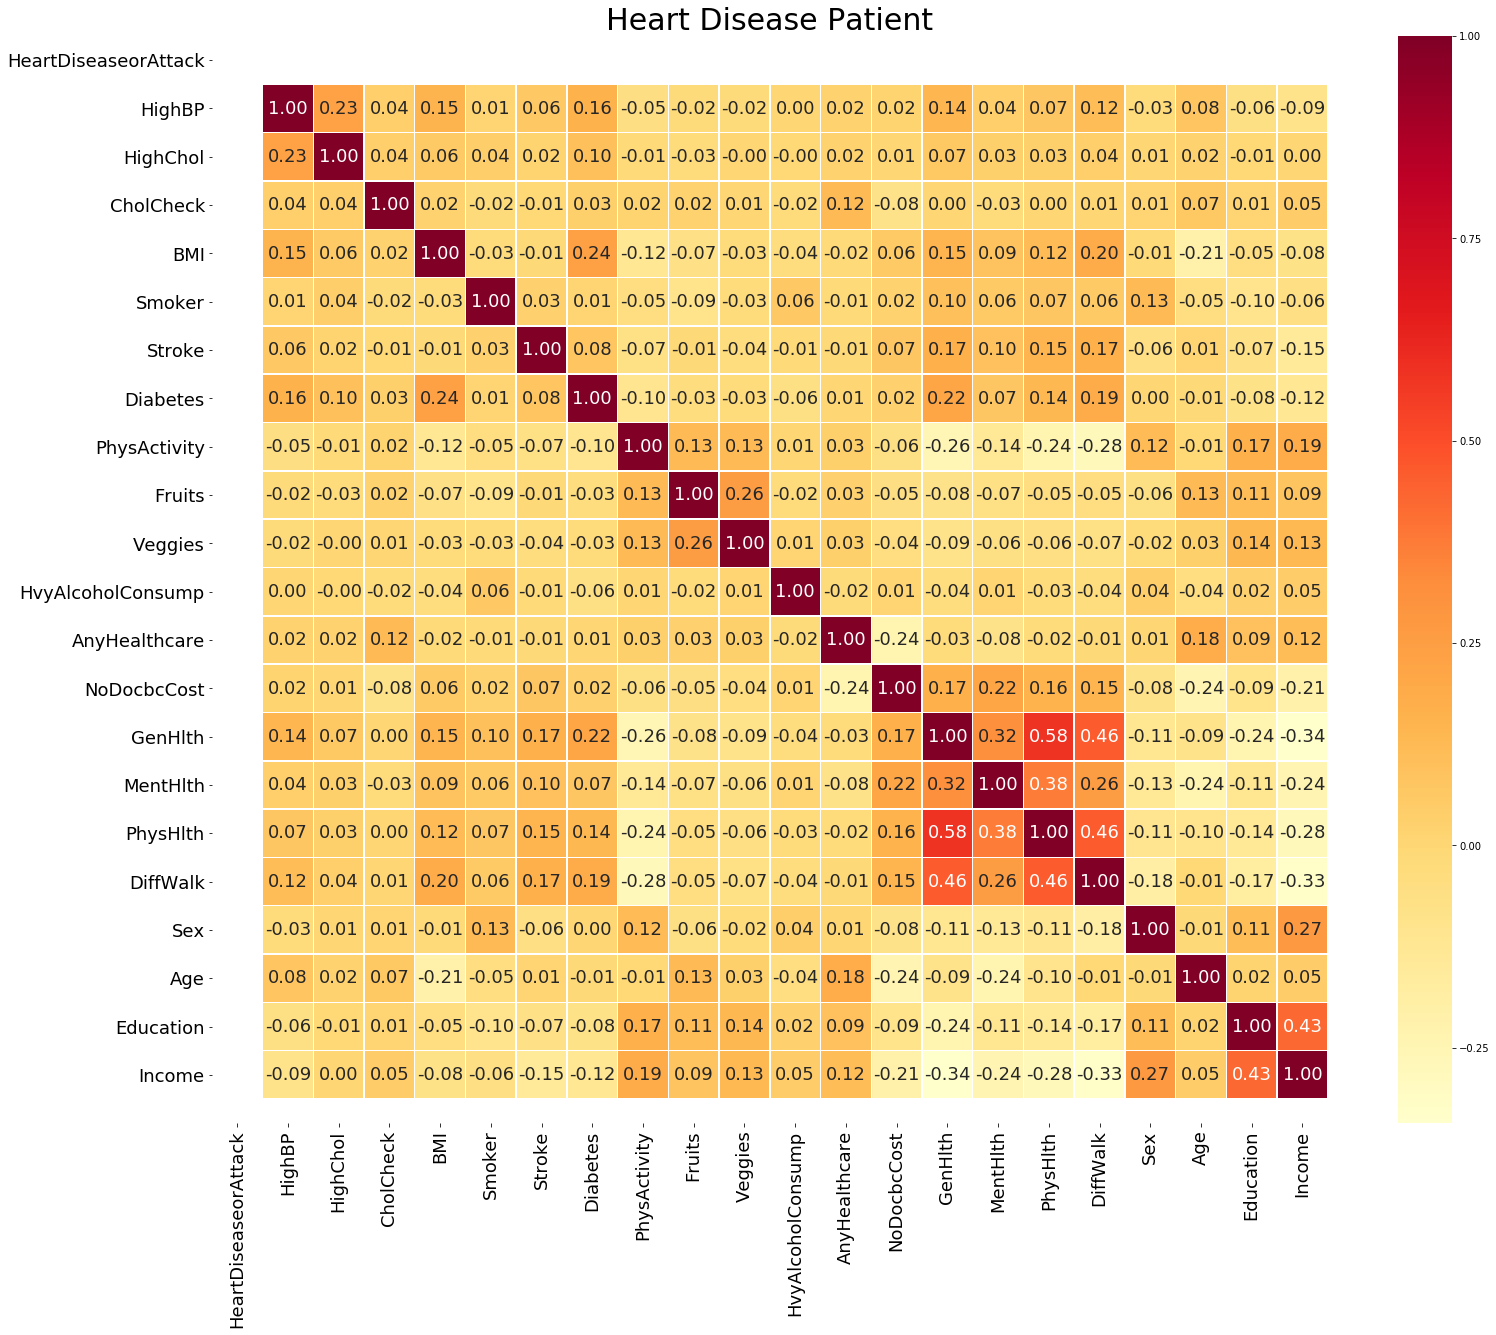

In [32]:
corr_matrix = heart_disease_patient_df.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Heart Disease Patient", size = 30)
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},  
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

## 상관분석 결과 

> Heatmap결과를 보니, 상관관계가 높은 feature들은 GenHlth, MenHlth, PhysHlth, DiffWalk 이렇게 4개인것으로 확인된다.

## 데이터 전처리 : 이상치 확인 및 처리

In [33]:
l = df.columns.values
len(l)

22

### Boxplot

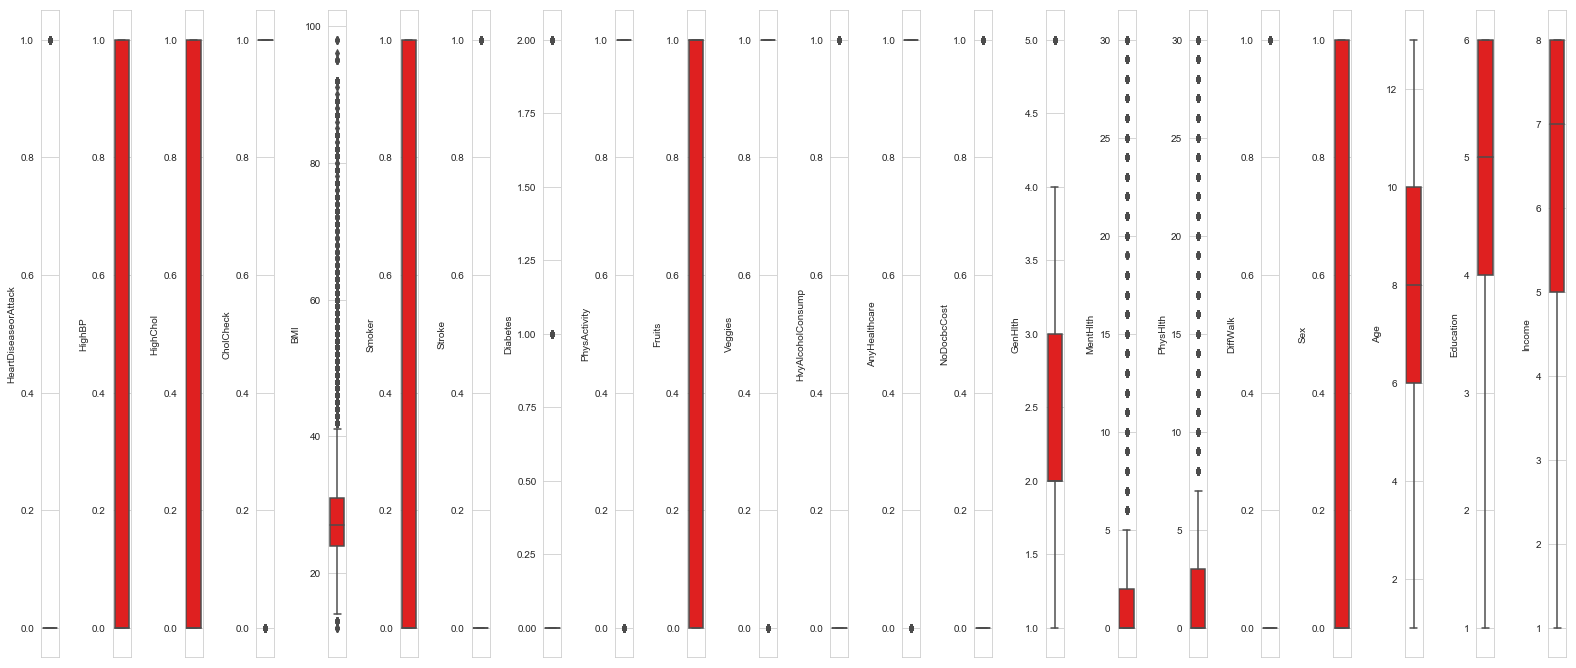

In [40]:
l = df.columns.values
number_of_columns=22
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,18*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows *2,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='red')
    plt.tight_layout()

- columns with no outliers  =>  HighBP, HighChol, Smoker, Fruits, Sex
- columns with outliers => rest of the columns

In [35]:
# Outlier가 있는 컬럼들만 분포도 확인해보기

outlier_features = df[["HighBP", "HighChol", "Smoker", "Fruits", "Sex"]]

# ---> 여기서 질문

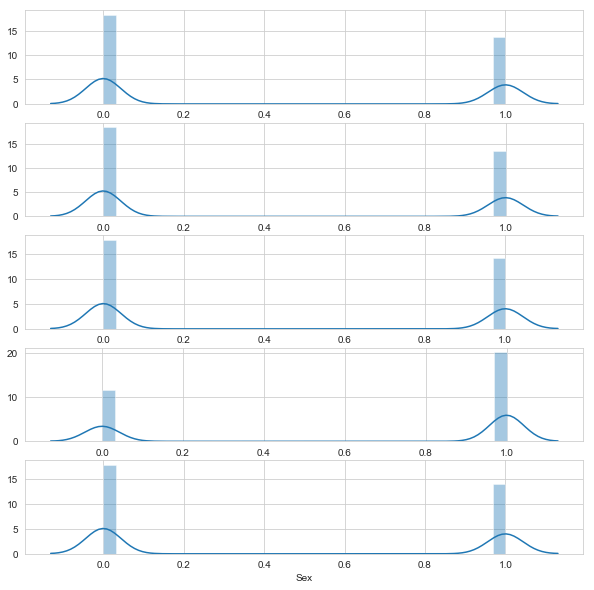

In [51]:
l = outlier_features.columns.values
number_of_columns=5
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(10,10))
for i in range(0,len(l)):
    plt.subplot(5,1,i+1)
    sns.distplot(df[l[i]],kde=True)

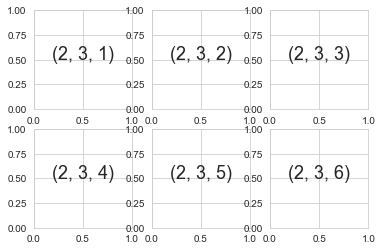

In [15]:
# subplot() 사용시 참고사항
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

### Histogram

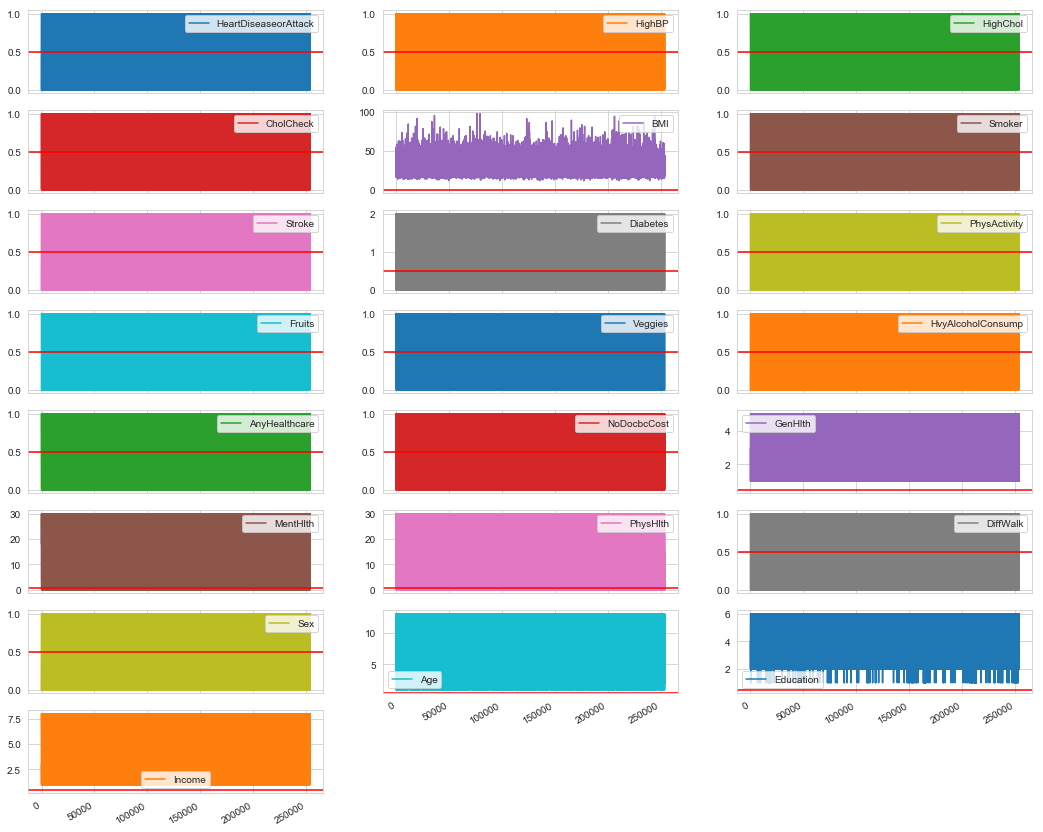

In [54]:
axes = df.plot(subplots=True, layout=(8, 3), figsize=(18,16))

for c in axes:
    for ax in c:
        ax.axhline(y=0.5, color='r')

## Factor Analysis (요인분석)

요인 분석을 수행하기 전에 데이터셋의 요인성을 평가해야하는데, Factorability는 데이터셋에 요인을 찾을 수 있는지를 확인하는 것이다.

인수 분해성(Factorability) 또는 샘플링 적절성을 확인하는 방법에는 아래와 같은 2가지 방법이 있다.

> 1. Barlett's Test
 -  chi-square value, p-value를 계산한 후 p-value가 0.05일시 탐색적 요인분석에 적합한 데이터라고 볼 수 있다.
 
 
> 2. Kaiser-Meyer-Olkin(KMO) 검정
 - 관측된 각 변수와 전체 모델에 대한 적절성을 결정한다.
 - KMO는 관측된 모든 변수간의 분산 비율을 추정한다.
 - Barlett와는 달리 p값이 없기 때문에 판단의 기준이 따로 있다. 
 - 0.6 미만의 KMO값은 부적절한 것으로 간주되며, 0.8 이상이면 우수하다고 판단 가능하다.
 - 다만, KMO test를 하려면 변수가 최대한 3개 이상이여야 한다.


> 우선, 심장병 환자 데이터셋부터 요인분석 진행

In [58]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(X1)
chi_square_value, p_value

(57993.3779966454, 0.0)

#### > [추가설명] Bartlett ’s test 이란

Bartlett's test of Homogeneity of Variances is a test to identify whether there are equal variances of a continuous or interval-level dependent variable across two or more groups of a categorical, independent variable. It tests the null hypothesis of no difference in variances between the groups.


When the P-Value is bigger than the significance level, we cannot reject the null hypothesis. When it is smaller, we cannot accept the null hypothesis. Here, the P-Value (0.06) is bigger than the significance level (0.05), so we cannot reject the null hypothesis that the data tested follows a normal distribution.

> p-value(0.0)이 significance level(0.05)보다 작기에, 해당 데이터셋이 normal distribution을 갖고 있다는 null hypythesis를 reject 할 수 있다 판단 가능함.

In [59]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X1)
kmo_model

0.7687278815582096

#### > [추가설명] Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy 이란?
The Kaiser-Meyer-Olkin (KMO) Test is a measure of how suited your data is for Factor Analysis. ... KMO values between 0.8 and 1 indicate the sampling is adequate. KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken.

> KMO value가 0.6보다 작다면 부적합, 0.8 ~ 1이라면 적합하다고 판단할 수 있기에, 
해당 데이터셋은 요인분석을 위해 충분히? 적합한 데이터셋으로 해석해보겠다.

## ** 참고한 프로젝트에서는 요인 수(n_factor)를 임의로 3개로 선택한 것 같은데, 이 데이터셋도 요인 수를 3개로 지정해도 괜찮은 건지 은비쌤한테 물어볼 것!!!

In [102]:
# 그냥 해보는 것 > 실험 해보고 지워
ev, v = fa1.get_eigenvalues()
ev

array([3.29623984, 1.57822659, 1.37909778, 1.31614775, 1.17720572,
       1.12166893, 0.99117606, 0.97176898, 0.9637719 , 0.92099787,
       0.8536752 , 0.80945995, 0.76043873, 0.73709571, 0.71936391,
       0.70348982, 0.68507896, 0.59912372, 0.52041757, 0.49979553,
       0.39575951])

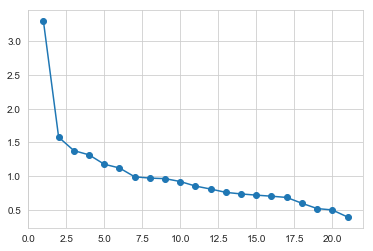

In [104]:
# 그냥 해보는 것 > 실험 해보고 지워
plt.scatter(range(1, X1.shape[1]+1), ev)
plt.plot(range(1, X1.shape[1]+1), ev)
plt.show()
# 참고 사이트 : https://ysyblog.tistory.com/124

## 은비쌤한테 질문!!!

>  Eigen 값이 1 이상일 때까지, 또는 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화할 수 있기에, 위 그래프를 보아하니 6 정도가 적당해보인다

In [74]:
fa1 = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa1.fit(X1)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [75]:
fa1.loadings_

array([[ 0.12593307,  0.18303347,  0.51053124],
       [-0.01706053,  0.09473979,  0.47187737],
       [-0.02659999,  0.30873146,  0.20490351],
       [ 0.12858939, -0.1477629 ,  0.50196358],
       [ 0.00957477, -0.22497003,  0.22646734],
       [ 0.32155048,  0.06855993,  0.00799857],
       [ 0.21481679,  0.08817027,  0.5077984 ],
       [-0.42229701,  0.0446852 , -0.17213505],
       [ 0.01403707,  0.42476739, -0.35732892],
       [-0.08299336,  0.27683757, -0.23592455],
       [-0.11956208, -0.18545004,  0.00844641],
       [-0.08556418,  0.52358661,  0.1760172 ],
       [ 0.29924863, -0.50299466, -0.12232257],
       [ 0.70133424, -0.04990284,  0.26453149],
       [ 0.49056749, -0.31074667,  0.03436611],
       [ 0.67837247, -0.056305  ,  0.16305933],
       [ 0.68626218,  0.05957481,  0.1986365 ],
       [-0.46632988, -0.18096402,  0.32297224],
       [-0.03171107,  0.66806805, -0.05892169],
       [-0.4412272 ,  0.12840006, -0.01910711],
       [-0.66610406,  0.12104835,  0.054

In [77]:
efa_result1 = pd.DataFrame(fa1.loadings_, index=X1.columns)
efa_result1

,0,1,2
HighBP,0.125933,0.183033,0.510531
HighChol,-0.017061,0.094740,0.471877
CholCheck,-0.026600,0.308731,0.204904
BMI,0.128589,-0.147763,0.501964
Smoker,0.009575,-0.224970,0.226467
Stroke,0.321550,0.068560,0.007999
Diabetes,0.214817,0.088170,0.507798
PhysActivity,-0.422297,0.044685,-0.172135
Fruits,0.014037,0.424767,-0.357329
Veggies,-0.082993,0.276838,-0.235925


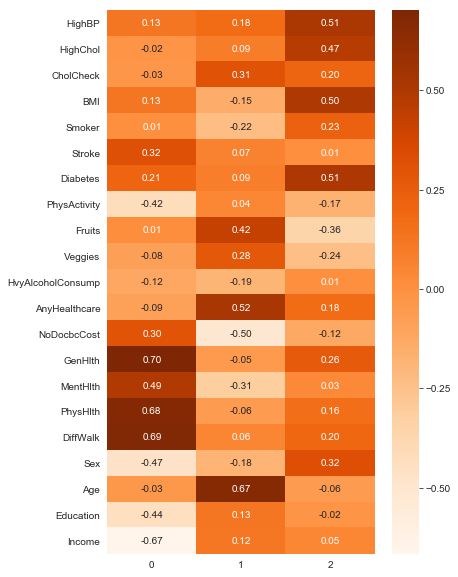

In [100]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result1, cmap="Oranges", annot=True, fmt='.2f')

> 아래는, 정상인 데이터셋으로 요인분석 진행

In [69]:
chi_square_value,p_value = calculate_bartlett_sphericity(X0)
chi_square_value, p_value

(566075.5466369701, 0.0)

In [71]:
kmo_all,kmo_model=calculate_kmo(X0)
kmo_model

0.7833412671094137

In [79]:
fa0 = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa0.fit(X0)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [80]:
fa0.loadings_

array([[ 0.15045555,  0.60748811, -0.23624311],
       [ 0.07085853,  0.52550383, -0.15465358],
       [-0.03583417,  0.33860528,  0.10913507],
       [ 0.19610821,  0.19846337, -0.31254097],
       [ 0.15028806,  0.09160996, -0.25597446],
       [ 0.18186434,  0.2072656 ,  0.00352908],
       [ 0.21878738,  0.44620944, -0.19512811],
       [-0.32984671, -0.0934468 ,  0.34196475],
       [ 0.0029047 ,  0.10826466,  0.63612548],
       [-0.04163705,  0.03949117,  0.5958843 ],
       [-0.05230331, -0.0761157 , -0.07016949],
       [-0.23088804,  0.41035677,  0.197128  ],
       [ 0.44433562, -0.32498718, -0.06024274],
       [ 0.67566973,  0.26637479, -0.20079964],
       [ 0.57783981, -0.12944046,  0.03328398],
       [ 0.69888988,  0.15692173,  0.06085194],
       [ 0.6306971 ,  0.29345794, -0.01216678],
       [-0.28491268,  0.01397382, -0.4268731 ],
       [ 0.02235255,  0.67714452,  0.01718296],
       [-0.37909326, -0.02585883,  0.41848801],
       [-0.59054659, -0.01891712,  0.247

In [81]:
efa_result0 = pd.DataFrame(fa0.loadings_, index=X0.columns)
efa_result0

,0,1,2
HighBP,0.150456,0.607488,-0.236243
HighChol,0.070859,0.525504,-0.154654
CholCheck,-0.035834,0.338605,0.109135
BMI,0.196108,0.198463,-0.312541
Smoker,0.150288,0.091610,-0.255974
Stroke,0.181864,0.207266,0.003529
Diabetes,0.218787,0.446209,-0.195128
PhysActivity,-0.329847,-0.093447,0.341965
Fruits,0.002905,0.108265,0.636125
Veggies,-0.041637,0.039491,0.595884


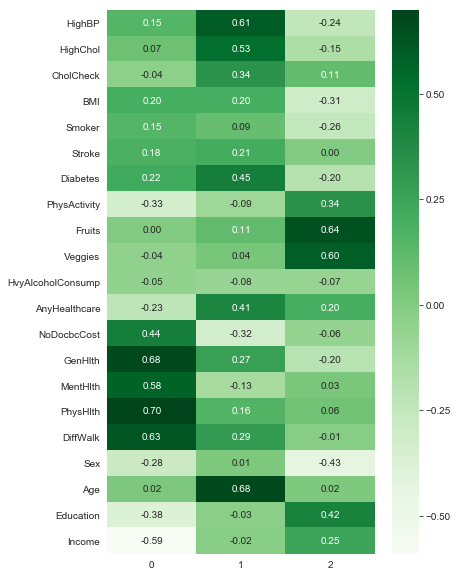

In [101]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result0, cmap="Greens", annot=True, fmt='.2f')